In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Dataset\placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
721,6.98,11.0,0
559,6.61,58.0,1
232,7.77,34.0,0
247,6.25,49.0,0
248,6.90,44.0,0


In [3]:
# lets describe the data 
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


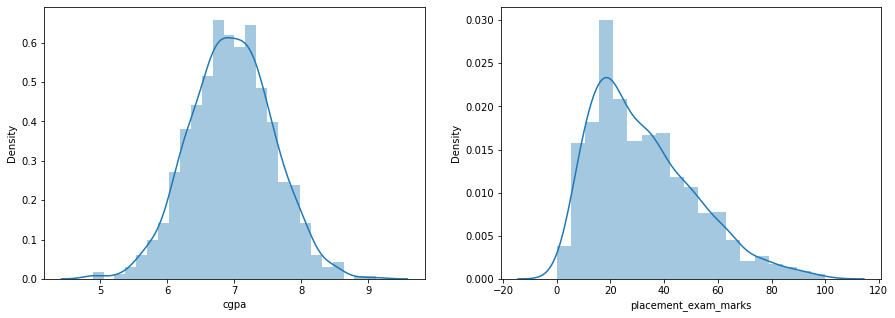

In [5]:
# lets see the distribution plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

# Observation:- we noticed that placement_exam_marks has been right skwed so lets handeled this column by Trimming and Capping Method

In [9]:
print(df['placement_exam_marks'].skew())# this not normally distributed
print(df['cgpa'].skew()) # this is normally distributed 

0.8356419499466834
-0.014529938929314918


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

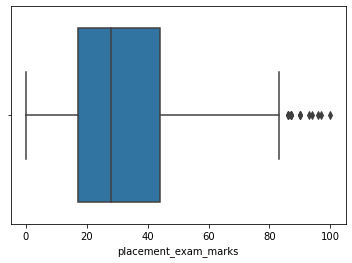

In [10]:
sns.boxplot(df['placement_exam_marks'])

In [12]:
# Finding the IQR
percentile_25 = df['placement_exam_marks'].quantile(0.25)
print(percentile_25)
percentile_75 = df['placement_exam_marks'].quantile(0.75)
print(percentile_75)

17.0
44.0


In [13]:
# lets calculate the IQR
IQR = percentile_75 - percentile_25
print(IQR)

27.0


In [14]:
# lets defined the upper limit and lower limit
upper_limit = percentile_75 + 1.5*IQR
lower_limit = percentile_25 - 1.5*IQR

In [15]:
print(upper_limit)
print(lower_limit)

84.5
-23.5


# LETS Finding out the Outliers

In [17]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [18]:
df[df['placement_exam_marks'] < lower_limit]
# lower limit has been 0 of the of placement columns so no need to worry about

,cgpa,placement_exam_marks,placed


# 1) Trimming

In [21]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# comparing the previos and latest change

'''You have three numbers that are used within subplot. subplot places multiple figures within the same window. You can place plots within a m x n grid, where m contains the number of rows and n contains the number of columns in your figure. p determines where you want to place your plot within the grid. The number p increases from 1 up to m x n, and the plots are placed from left to right, and top to bottom.

In this case, when you do subplot(1,2,1); or subplot(121);, you would like to have one row and two columns worth of figures. The last number, p=1 means that you wish to place the plot in the left most column. When you do subplot(1,2,2); or subplot(122);, this is when p=2 and you wish to place the plot in the right most column.'''

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

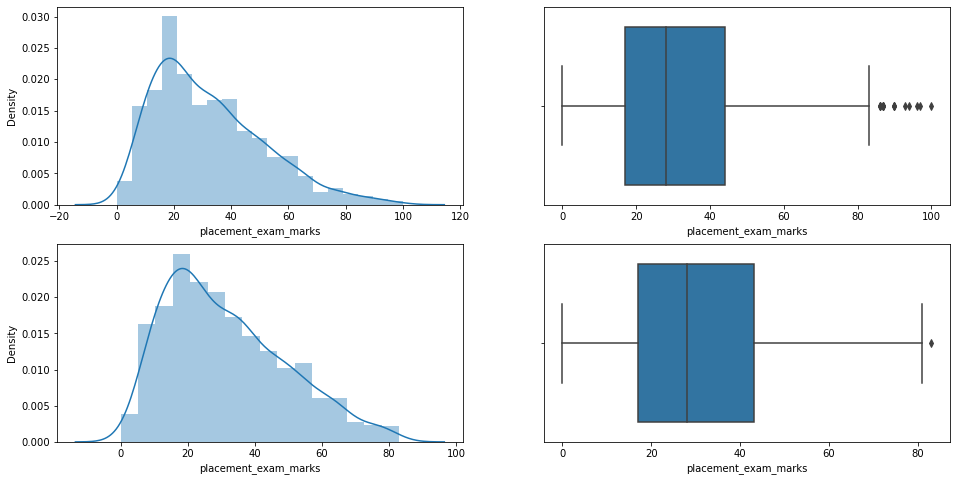

In [25]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()


# Capping

#### how does numpy where function works
np.where(1>condition,2>if true execute first statement(true statement) ,3>if false then execute the another statement))

In [44]:
new_cap_df = df.copy()

In [46]:

new_cap_df['placement_exam_marks'] = np.where(new_cap_df['placement_exam_marks'] > upper_limit,upper_limit,
                                     np.where(new_cap_df['placement_exam_marks'] < lower_limit,lower_limit,
                                     new_cap_df['placement_exam_marks']))

In [47]:
new_cap_df.shape

(1000, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

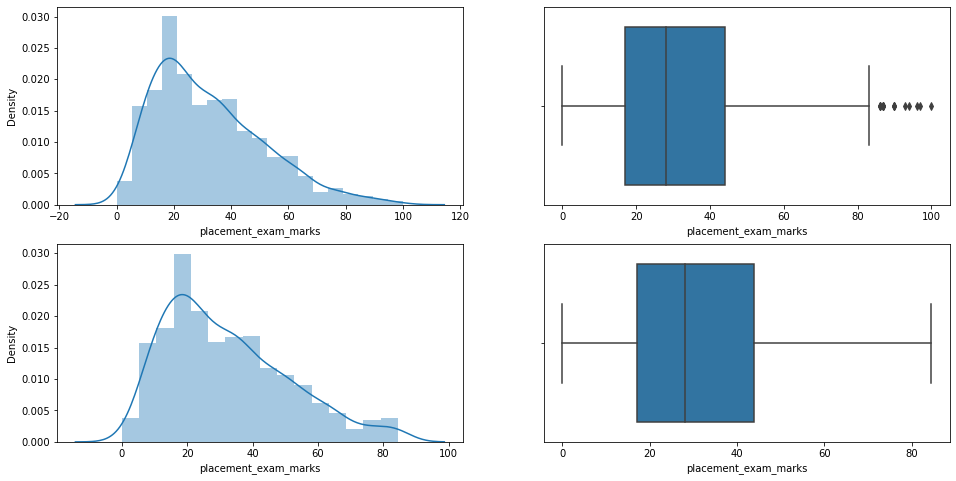

In [49]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_cap_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_cap_df['placement_exam_marks'])

plt.show()

# Observation:- see the distribution plot near 80 values the bar graph has bben incresed as compare to previos one and in box plot the otliers are removed totally by capping techniques